![image.png](attachment:image.png)

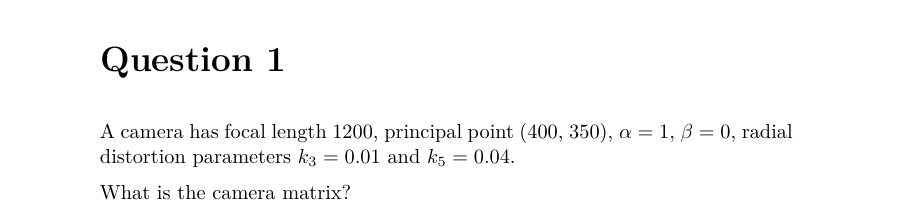

In [3]:
import cv2 
import numpy as np 

focal_point = 1200
principal_pointx = 400 
principal_pointy = 350 
alphaa = 1 
beta = 0 
k3 = 0.01
k5=0.04 


K = np.array([[focal_point, 0, principal_pointx], [0, focal_point, principal_pointy], [0, 0, 1]])
K

array([[1200,    0,  400],
       [   0, 1200,  350],
       [   0,    0,    1]])

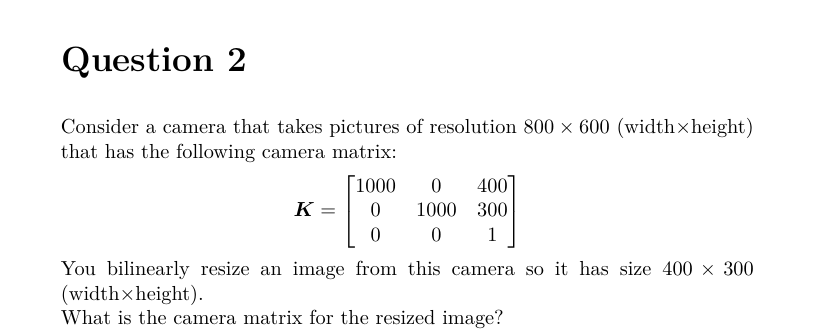

In [8]:
K = np.array([[500,0,200],[0,500,250],[0,0,1]])
print(K)

[[500   0 200]
 [  0 500 250]
 [  0   0   1]]


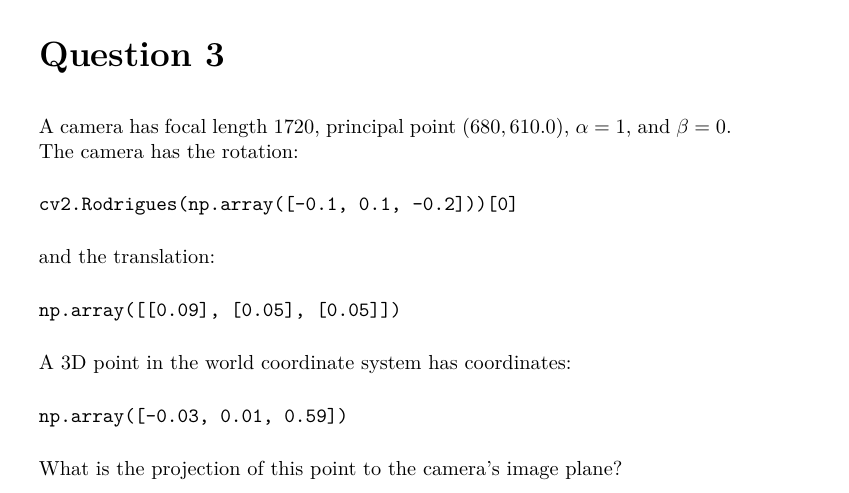

In [20]:
R = cv2.Rodrigues(np.array([-0.1, 0.1,-0.2]))[0]
t = np.array([[0.09], [0.05], [0.05]])
Q = np.array([-0.03, 0.01, 0.59])

K = np.array([[1720,0,680],[0,1720,610],[0,0,1]])
P = K @ np.hstack((R, t)) 

# projection 
Q = np.hstack((Q,1))
q = P @ Q
q = q[:2]/q[2]

print(q.astype(int))
# Answer is G 


[1023  930]


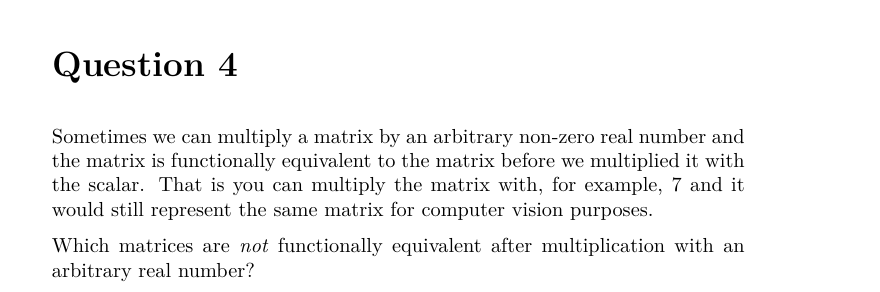

In [21]:
# i) Rotation matrix


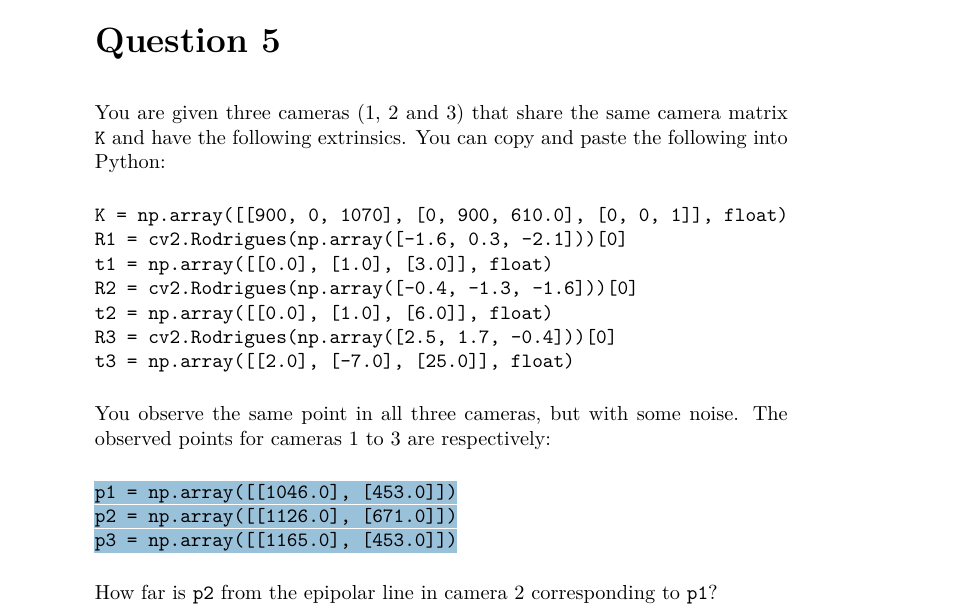

In [128]:

K = np.array([[900, 0, 1070], [0, 900, 610.0], [0, 0, 1]], float)
R1 = cv2.Rodrigues(np.array([-1.6, 0.3,-2.1]))[0]
t1 = np.array([[0.0], [1.0], [3.0]], float)
R2 = cv2.Rodrigues(np.array([-0.4,-1.3,-1.6]))[0]
t2 = np.array([[0.0], [1.0], [6.0]], float)
R3 = cv2.Rodrigues(np.array([2.5, 1.7,-0.4]))[0]
t3 = np.array([[2.0], [-7.0], [25.0]], float)
p1 = np.array([[1046.0], [453.0],[1.0]])
p2 = np.array([[1126.0], [671.0],[1.0]])
p3 = np.array([[1165.0], [453.0],[1.0]])

R = R2 @ R1.T
t = t2 - R2 @ R1.T @ t1 
E = crossOp(t.T[0]) @ R

F = np.linalg.inv(K).T @ E @ np.linalg.inv(K)
E.astype(int)

array([[-4, -2,  1],
       [-1,  0, -6],
       [ 2,  1,  0]])

In [154]:
l = F @ p1
l = l/np.sqrt(l[0]**2 +l[1]**2)
p2.T@ l

array([[-13.27182907]])

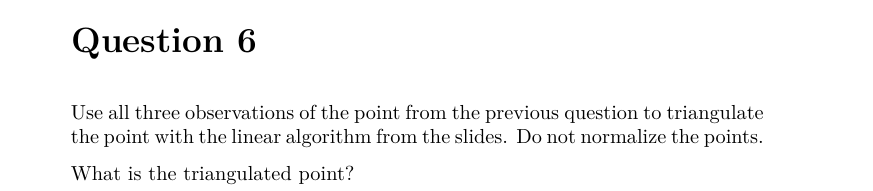

In [136]:
def triangulate(qn,pn):
    """ Input 
        Q: list of n pixel coordinates (q1,q2,...qn)
        Pn: list of n projection matrices 
        output: triangulation of the 3d point
    """
    
    if len(qn) != len(pn):
        raise ValueError("Expected lists of equal length, len(Q)!=len(pn)")

    
    B_i = lambda P,q: np.array([  [P[2]*q[0] - P[0]],[P[2]*q[1] - P[1]] ])

    B = np.array((([B_i(P_i,q_i) for P_i, q_i in zip(pn,qn)])))

    B = B.reshape(len(pn)*2,4)

    U,S,VT = np.linalg.svd(B)

    Q = VT[-1,:].T
    return Q

def Pi(coordinates):
    inhom = coordinates[:-1]/coordinates[-1]
    return inhom 

In [144]:
P1 = K @ np.hstack((R1, t1))
P2 = K @ np.hstack((R2, t2))
P3 = K @ np.hstack((R3, t3))


Q = triangulate([p1,p2,p3],[P1,P2,P3])
Q[:3]/Q[3]

array([3.10058867, 0.74321098, 0.46490561])

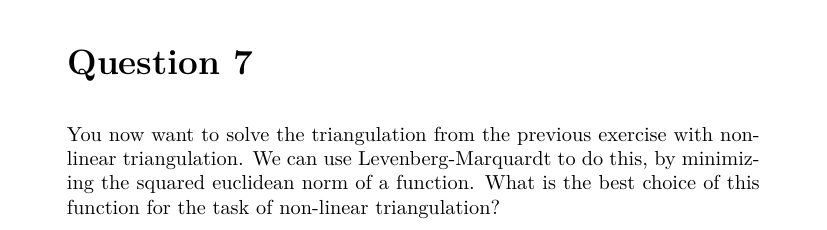

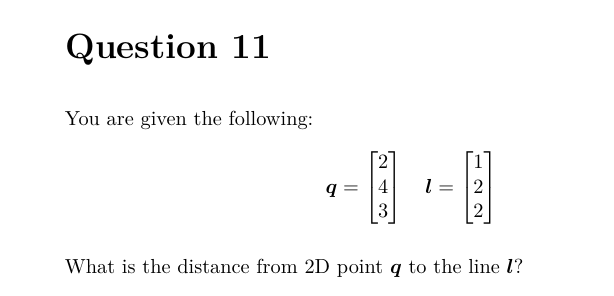

In [162]:
q = np.array([2,4,3])
l = np.array([1,2,2])

l = l/np.sqrt(l[0]**2 +l[1]**2)

q = q/q[2]
q@l

2.3851391759997753

In [169]:
inliers = 103 
total_matches = 404 
p = inliers/total_matches 
p_all_inliers = p**4 

k = np.ceil(np.log(0.05)/ np.log(1-p_all_inliers) )
k

708.0